In [4]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import string
import nltk
import seaborn as sns
import sklearn
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
from nltk.stem.porter import *
from wordcloud import WordCloud

In [3]:
data = pd.read_csv("sentiment.csv",encoding="ISO-8859-1")
data.columns = ['1', '2','3','4','5','6']
del data['2']
del data['3']
del data['4']
del data['5']
data.columns=['Label','Tweet']
data.insert(0, 'Id', range(1, len(data)+1))
data

,Id,Label,Tweet
0,1,0,is upset that he can't update his Facebook by ...
1,2,0,@Kenichan I dived many times for the ball. Man...
2,3,0,my whole body feels itchy and like its on fire
3,4,0,"@nationwideclass no, it's not behaving at all...."
4,5,0,@Kwesidei not the whole crew
...,...,...,...
1599994,1599995,4,Just woke up. Having no school is the best fee...
1599995,1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599996,1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599997,1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [6]:
data['Label'] = data['Label'].map({4: 1, 0: 0})
data

,Id,Label,Tweet
0,1,0,is upset that he can't update his Facebook by ...
1,2,0,@Kenichan I dived many times for the ball. Man...
2,3,0,my whole body feels itchy and like its on fire
3,4,0,"@nationwideclass no, it's not behaving at all...."
4,5,0,@Kwesidei not the whole crew
...,...,...,...
1599994,1599995,1,Just woke up. Having no school is the best fee...
1599995,1599996,1,TheWDB.com - Very cool to hear old Walt interv...
1599996,1599997,1,Are you ready for your MoJo Makeover? Ask me f...
1599997,1599998,1,Happy 38th Birthday to my boo of alll time!!! ...


In [5]:
print(data['Label'].value_counts())

4    800000
0    799999
Name: Label, dtype: int64


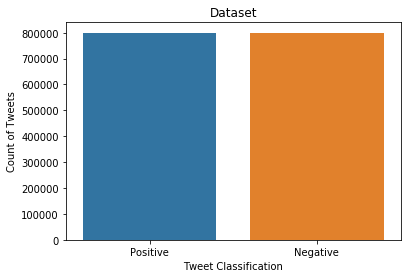

In [7]:
positive = data['Label'].value_counts()[0]
negative = data['Label'].value_counts()[1]
sns.barplot(['Positive','Negative'],[positive,negative])
plt.xlabel('Tweet Classification')
plt.ylabel('Count of Tweets')
plt.title('Dataset')
plt.show()

In [8]:
def pattern_removal(input_text, pattern):
    r = re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
        
    return input_text 

# remove twitter handles (@user)
data['Cleant_tweet'] = np.vectorize(pattern_removal)(data['Tweet'], "@[\w]*")
data.head()

,Id,Label,Tweet,Cleant_tweet
0,1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
1,2,0,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...
2,3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,4,0,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."
4,5,0,@Kwesidei not the whole crew,not the whole crew


In [9]:
data['Cleant_tweet'] = data['Cleant_tweet'].str.replace("[^a-zA-Z#]", " ")
data.head()

,Id,Label,Tweet,Cleant_tweet
0,1,0,is upset that he can't update his Facebook by ...,is upset that he can t update his Facebook by ...
1,2,0,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball Managed to s...
2,3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,4,0,"@nationwideclass no, it's not behaving at all....",no it s not behaving at all i m mad why am...
4,5,0,@Kwesidei not the whole crew,not the whole crew


In [10]:
data['Cleant_tweet'] = data['Cleant_tweet'].str.replace(r'\b(\w{1,2})\b', '')
data.head()

,Id,Label,Tweet,Cleant_tweet
0,1,0,is upset that he can't update his Facebook by ...,upset that can update his Facebook texting...
1,2,0,@Kenichan I dived many times for the ball. Man...,dived many times for the ball Managed save...
2,3,0,my whole body feels itchy and like its on fire,whole body feels itchy and like its fire
3,4,0,"@nationwideclass no, it's not behaving at all....",not behaving all mad why here bec...
4,5,0,@Kwesidei not the whole crew,not the whole crew


In [11]:
Tokenized_tweet = data['Cleant_tweet'].apply(lambda x: x.split())
Tokenized_tweet.head()

0    [upset, that, can, update, his, Facebook, text...
1    [dived, many, times, for, the, ball, Managed, ...
2    [whole, body, feels, itchy, and, like, its, fire]
3    [not, behaving, all, mad, why, here, because, ...
4                              [not, the, whole, crew]
Name: Cleant_tweet, dtype: object

In [12]:
stemmer = PorterStemmer()
Tokenized_tweet = Tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
Tokenized_tweet.head()

0    [upset, that, can, updat, hi, facebook, text, ...
1    [dive, mani, time, for, the, ball, manag, save...
2      [whole, bodi, feel, itchi, and, like, it, fire]
3    [not, behav, all, mad, whi, here, becaus, can,...
4                              [not, the, whole, crew]
Name: Cleant_tweet, dtype: object

In [13]:
for i in range(len(Tokenized_tweet)):
    Tokenized_tweet[i] = ' '.join(Tokenized_tweet[i])
data['Cleant_tweet'] = Tokenized_tweet
data.head()

,Id,Label,Tweet,Cleant_tweet
0,1,0,is upset that he can't update his Facebook by ...,upset that can updat hi facebook text and migh...
1,2,0,@Kenichan I dived many times for the ball. Man...,dive mani time for the ball manag save the res...
2,3,0,my whole body feels itchy and like its on fire,whole bodi feel itchi and like it fire
3,4,0,"@nationwideclass no, it's not behaving at all....",not behav all mad whi here becaus can see you ...
4,5,0,@Kwesidei not the whole crew,not the whole crew


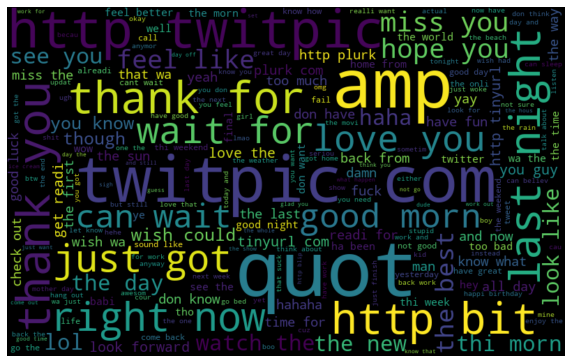

In [14]:
doc_words = ' '.join([text for text in data['Cleant_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(doc_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Positive words


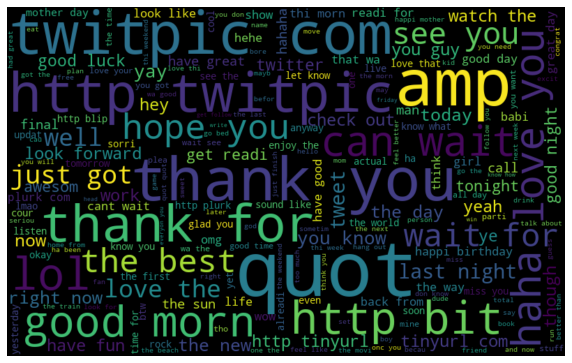

In [15]:
print("Positive words")
pos_words =' '.join([text for text in data['Cleant_tweet'][data['Label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pos_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Negative words


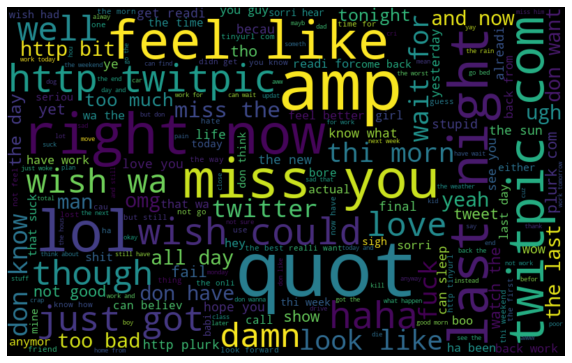

In [16]:
print("Negative words")
neg_words =' '.join([text for text in data['Cleant_tweet'][data['Label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neg_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [17]:
def extract_hashtag(inp):
    hashtags = []
    # Loop over the words in the tweet
    for i in inp:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [18]:
pos_ht = extract_hashtag(data['Cleant_tweet'][data['Label'] == 1])
pos_ht = sum(pos_ht,[])

neg_ht = extract_hashtag(data['Cleant_tweet'][data['Label'] == 0])
neg_ht = sum(neg_ht,[])

Plot for positive hashtag tweets


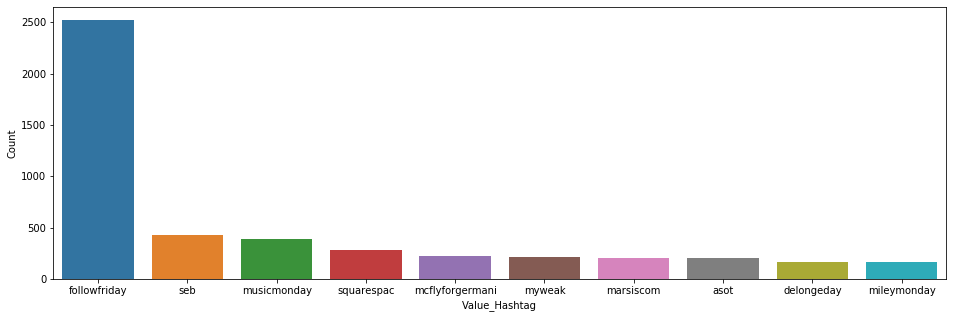

In [19]:
print("Plot for positive hashtag tweets")
a = nltk.FreqDist(pos_ht) 
d = pd.DataFrame({'Value_Hashtag': list(a.keys()),
                  'Count': list(a.values())})
   
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Value_Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

Plot for negative hashtag tweets


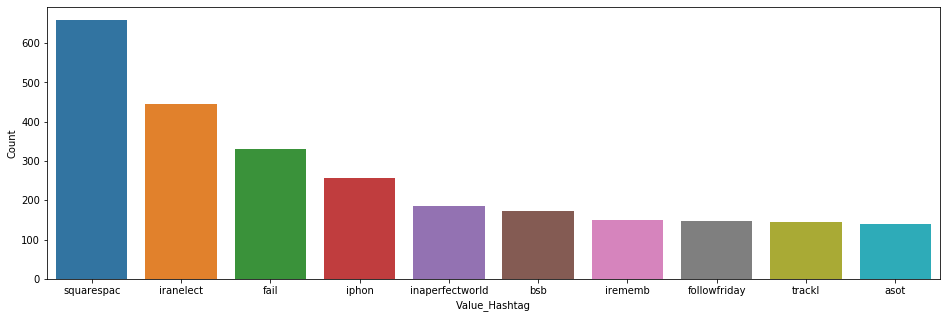

In [20]:
print("Plot for negative hashtag tweets")
b = nltk.FreqDist(neg_ht)
e = pd.DataFrame({'Value_Hashtag': list(b.keys()),
                  'Count': list(b.values())})
   
e = e.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Value_Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [21]:
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(data['Cleant_tweet'])
#print(DataFrame(bow.A, columns=bow_vectorizer.get_feature_names()).to_string())

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(data['Cleant_tweet'])

In [33]:
train_data=data[['Id','Label', 'Tweet']].head(1039999)
test_data=data[['Id', 'Tweet']].tail(56000)



,Id,Label,Tweet
0,1,0,is upset that he can't update his Facebook by ...
1,2,0,@Kenichan I dived many times for the ball. Man...
2,3,0,my whole body feels itchy and like its on fire
3,4,0,"@nationwideclass no, it's not behaving at all...."
4,5,0,@Kwesidei not the whole crew


In [36]:
print("Bag of word feature Model")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:1039999]
train_bow.todense()
test_bow = bow[1039999:,:]

xtrain, xvalid, ytrain, yvalid = train_test_split(train_bow,train_data['Label'], random_state=42, test_size=0.3)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(xtrain, ytrain) 

prediction = logreg.predict_proba(xvalid) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int)

from sklearn import metrics
print(metrics.classification_report(yvalid,prediction_int))
f1_score(yvalid, prediction_int)

Bag of word feature Model
              precision    recall  f1-score   support

           0       0.89      0.82      0.85    239877
           1       0.53      0.66      0.58     72123

    accuracy                           0.78    312000
   macro avg       0.71      0.74      0.72    312000
weighted avg       0.80      0.78      0.79    312000



0.5841414577043929

In [37]:
print("TFid feature Model")
#train_tfidf = tfidf[:31962]
#test_tfidf = tfidf[31962:,:]
train_tfidf_matrix = tfidf[:1039999]
train_tfidf_matrix.todense()

x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix,train_data['Label'],test_size=0.3,random_state=42)
logreg.fit(x_train_tfidf, y_train_tfidf)

prediction = logreg.predict_proba(x_valid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
print(metrics.classification_report(y_valid_tfidf,prediction_int))
f1_score(yvalid, prediction_int)

TFid feature Model
              precision    recall  f1-score   support

           0       0.89      0.82      0.85    239877
           1       0.53      0.66      0.58     72123

    accuracy                           0.78    312000
   macro avg       0.71      0.74      0.72    312000
weighted avg       0.80      0.78      0.79    312000



0.5839990623245714